In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.style.use('seaborn-poster')

In [2]:
final_ulta = pd.read_csv('final_ulta.csv',encoding = "ISO-8859-1") 

In [3]:
final_ulta.head()

,brand,name,price,rating,ingredients
0,It Cosmetics,Confidence In A Cream Anti-Aging Moisturizer,49.0,4.5,"Aqua (Water, Eau), Butylene Glycol, Cyclopenta..."
1,Clinique,Dramatically Different Moisturizing Lotion+,29.5,4.3,"Water / Aqua / Eau, Mineral Oil / Paraffinum L..."
2,Peter Thomas Roth,Water Drench Hyaluronic Cloud Cream Hydrating ...,52.0,4.4,"Water/Aqua/Eau, Glycerin, Dipropylene Glycol, ..."
3,ELEMIS,Pro-Collagen Marine Cream,128.0,4.5,"Aqua/Water/Eau, Glycerin, Caprylic/Capric Trig..."
4,StriVectin,SD Advanced Intensive Concentrate for Wrinkles...,139.0,4.5,"Aqua (Water, Eau), Glycerin, Pentaerythrityl T..."


In [4]:
#Add a new column that specifies whether the product contains parabens
final_ulta=final_ulta.copy()
final_ulta['ingredients'] = final_ulta['ingredients'].astype(str)
parabens_list=['paraben']
final_ulta['contains_parabens']=0

pos=-1
for x in final_ulta['ingredients']:
    pos+=1
    for paraben in parabens_list:
        if paraben in x:
            final_ulta['contains_parabens'].loc[pos]=1
final_ulta.head()

/Users/katehofer/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,brand,name,price,rating,ingredients,contains_parabens
0,It Cosmetics,Confidence In A Cream Anti-Aging Moisturizer,49.0,4.5,"Aqua (Water, Eau), Butylene Glycol, Cyclopenta...",0
1,Clinique,Dramatically Different Moisturizing Lotion+,29.5,4.3,"Water / Aqua / Eau, Mineral Oil / Paraffinum L...",0
2,Peter Thomas Roth,Water Drench Hyaluronic Cloud Cream Hydrating ...,52.0,4.4,"Water/Aqua/Eau, Glycerin, Dipropylene Glycol, ...",0
3,ELEMIS,Pro-Collagen Marine Cream,128.0,4.5,"Aqua/Water/Eau, Glycerin, Caprylic/Capric Trig...",0
4,StriVectin,SD Advanced Intensive Concentrate for Wrinkles...,139.0,4.5,"Aqua (Water, Eau), Glycerin, Pentaerythrityl T...",0


In [5]:
#only 43 products contain parabens
final_ulta['contains_parabens'].value_counts()

0    560
1     43
Name: contains_parabens, dtype: int64

*******
### START MERGE HERE

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 10.0)
plt.style.use('seaborn-poster')




## Dataset 2 - Sephora Data

Imported second raw dataset, "cosmetic.csv", into notebook. Data downloaded from GitHub.

In [8]:
raw2 = pd.read_csv("cosmetic.csv")
raw2.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


The following cell cleans the `raw2` data. 
1. We put all of the column names in lowercase letters to make it easier to refer to specific columns for future analysis.
2. We drop the 'url' column as the url for each product is not relevant for our data analysis.
3. To make it easier to read, we kept only the first word before the hyphen in the "Label" column. For example, "moisturizing-cream-oils-mists" is now just "moisturizing". 

We copied `raw2` and set it equal to a new dataframe titled `skin`.

In [9]:
# 1. Lowercase column names
col_lower = [i.lower() for i in raw2.columns]
raw2=raw2.copy()
raw2.columns=col_lower

In [10]:
raw2.head()

,label,url,brand,name,price,rank,skin_type,ingredients
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


In [11]:
# 2. Drop url column
raw2=raw2.drop(['url'], axis=1)

In [12]:
# 3. Keep word before hyphen in 'label' column
liste = [i.split("-",1)[0] for i in raw2.label]
skin = raw2.copy()
skin['label'] = liste 

skin.head()



,label,brand,name,price,rank,skin_type,ingredients
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...


Next, we wanted to simplify the "skin_type" column information. To do this we took each unique skin type and made a new column for each one. For each product in the dataset, if the product's 'skin_type' column specifies a certain skin type, that skin type's column changes to 1. If not, it stays at 0 (each skin type column is its own dummy variable). 

For example, the Crème de la Mer (row 0) says it's for Normal, Oily, Combination, Dry, and Sensitive types of skin. So each of those skin type columns will be filled with a 1 instead of the default 0. 

To do this we did the following steps:
1. Found unique skin types and manually created a list of them tiled `unique_skin_list`
2. Looped though `unique_skin_list` and added a new column of zeros to `skin` dataframe for each string in the list.
3. Made all entries within "skin_type" column strings (becuase some were floats from the original dataset)
4. Loop through each product's "skin_type" column. For each product, we looked to see if a skin type from `unique_skin_list` was in that product's "skin_type" column. If it was, we set the corresponding column =1. If it wasn't, we left it =0. 


In [13]:
# 1. Find unique skin types and create list of them
print(skin.skin_type.unique())
unique_skin_list = ['Normal','Oily', 'Combination', 'Dry', 'Sensitive', 'Full', 'Natural', 'Matte', 'Light', 'Radiant']

["['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Natural\\n']"
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n', '✔ Sensitive\\n']" '[]'
 "['✔ Normal\\n', '✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Normal\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Normal\\n', '✔ Dry\\n']" "['✔ Combination\\n', '✔ Dry\\n']"
 "['✔ Oily\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Full\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Normal\\n', '✔ Combination\\n', '✔ Dry\\n', '✔ Sensitive\\n']"
 "['✔ Oily\\n', '✔ Combination\\n']"
 "['✔ Medium\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Matte\\n']"
 "['✔ Full\\n', '✔ Sensitive\\n', '✔ Normal\\n', '✔ Dry\\n', '✔ Combination\\n', '✔ Oily\\n', '✔ Radiant\\n']"
 "

In [14]:
# 2. Loop through list and add a new column of zeros to dataframe for each unqiue skin-type
for x in unique_skin_list:
    skin[x]=0

skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",0,0,0,0,0,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,0,0,0,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0,0,0,0,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,0,0,0,0,0,0,0,0,0,0


In [15]:
# 3. make all entries within "skin_type" column strings
skin['skin_type'] = skin['skin_type'].astype(str)

In [16]:
# 4. Loop through product's "skin_type" column and adjust skin type columns accordingly
count=-1
for x in skin['skin_type']:
    count+=1
    for s_type in unique_skin_list:
        if s_type in x:
            skin.loc[count,s_type]=1

            


To make the "price" column of `skin` to look similar to our first dataset's "price" column, we dropped the dollar sign from the column values.

In [17]:
skin['price'] = skin['price'].str.replace('$','')

In [18]:
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00\n(214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


Some rows' "price" column show two values (ex: Facial Treatment Essence (Row 2) has "price" = 179.00\n(214.00 value)), so we want to just show the first price. 

To do this we did the following:

1. We looped through the "price" column to find any rows that had a string length greater than 8. We know these rows are the ones that have two values and that we want to change.

2. For those rows identified, we found the first decimal point and then spliced that string 2 indexes past it so that just the first price is kept

In [19]:
# 1) look through "price" to find rows with string length greater than 8. Print value and row number. 
skin['price'] = skin['price'].astype(str)
row=-1
for x in skin['price']:
    row+=1
    if len(x)>8:
        print(x)
        print(row)

179.00
(214.00 value)
1
90.00
(123.00 value)
15
69.00
(106.00 value)
178
68.00
(96.00 value)
185
179.00
(214.00 value)
300
90.00
(123.00 value)
307
16.00 8.00
443
45.00
(66.00 value)
451
7.00
(10.00 value)
454
7.50 4.00
475
7.50 4.00
477
34.00
(63.00 value)
515
39.00 27.00
544
55.00
(69.00 value)
551
28.00 19.00
557
35.00
(45.00 value)
577
179.00
(214.00 value)
600
158.00
(175.00 value)
603
178.00
(210.00 value)
607
88.00
(102.00 value)
608
90.00
(123.00 value)
617
88.00
(102.00 value)
618
28.00
(43.00 value)
620
23.00
(30.00 value)
625
88.00
(102.00 value)
700
68.00
(97.00 value)
733
100.00 59.00
757
169.00
(189.00 value)
759
35.00
(71.00 value)
761
29.00
(67.00 value)
785
90.00 59.00
795
68.00
(72.00 value)
801
55.00
(88.00 value)
803
59.00
(93.00 value)
820
34.00
(63.00 value)
836
84.00
(115.00 value)
843
75.00
(254.00 value)
901
135.00
(170.00 value)
902
36.00
(57.00 value)
904
25.00
(36.00 value)
905
18.00
(24.00 value)
934
169.00
(236.00 value)
957
34.00 22.00
1003
35.00
(45.00 v

In [20]:
# 2) find decimal and splice
step=-1
for x in skin['price']:
    step+=1
    if len(x)>8:
        first_dec=skin.loc[step,'price'].find('.')
        skin.loc[step,'price']= skin.loc[step,'price'][:(first_dec+3)]

            
skin.head()

,label,brand,name,price,rank,skin_type,ingredients,Normal,Oily,Combination,Dry,Sensitive,Full,Natural,Matte,Light,Radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


We dropped the "skin_type" column now that we made each unique skin type its own column.

In [21]:
skin = skin.drop(['skin_type'], axis = 1)

Next, we lower cased all the columns again (because the new skin type columns were capitalized).

In [22]:
lower_ingredients = [i.lower() for i in skin.columns]
skin=skin.copy()
skin.columns=lower_ingredients

In [23]:
skin.head()

,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
0,moisturizing,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.00,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0


Finally, we changed the string in the "price" column back to floats so this column could be utilized in future analyses.

In [24]:
skin['price'] = skin['price'].astype(float)

Here are the summary statistics of our cleaned data:

In [25]:
skin.describe()

,price,rank,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant
count,1626.000000,1624.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,55.820381,4.162931,0.654601,0.613497,0.660123,0.614110,0.505521,0.003681,0.003067,0.004294,0.006135,0.002454
std,44.420960,0.610399,0.475644,0.487098,0.473813,0.486954,0.500123,0.060578,0.055317,0.065411,0.078109,0.049492
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#Add a new column that specifies whether the product contains parabens
skin=skin.copy()
skin['ingredients'] = skin['ingredients'].astype(str)
parabens_list=['paraben']
skin['contains_parabens']=0

pos=-1
for x in skin['ingredients']:
    pos+=1
    for paraben in parabens_list:
        if paraben in x:
            skin['contains_parabens'].loc[pos]=1
skin.head()

/Users/katehofer/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,label,brand,name,price,rank,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant,contains_parabens
0,moisturizing,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0,1
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0,0


In [27]:
skin['normal'].value_counts()
skin['matte'].value_counts()

0    1623
1       7
Name: matte, dtype: int64

In [28]:
skin.rename(columns={'rank': 'rating'}, inplace=True)


In [29]:
skin.label.unique()

array(['moisturizing', 'cleanser', 'facial', 'face', 'eye', 'sunscreen'],
      dtype=object)

In [30]:
# for x in skin.label:
#     print (x)
# #     if skin.label == 'moisturizing':
    

In [31]:
moisture_sephora_subset = skin[(skin["label"] == 'moisturizing')]

In [32]:
len(moisture_sephora_subset)

300

In [33]:
len(skin)

1630

In [34]:
len(final_ulta)

603

In [35]:
moisture_sephora_subset.head()

,label,brand,name,price,rating,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant,contains_parabens
0,moisturizing,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,0,0,0,0,0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,1,1,1,0,0,0,0,0,1
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,1,1,0,0,0,0,0,0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,0,0,0,0,0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,1,1,1,1,0,0,0,0


In [36]:
final_ulta.head()

,brand,name,price,rating,ingredients,contains_parabens
0,It Cosmetics,Confidence In A Cream Anti-Aging Moisturizer,49.0,4.5,"Aqua (Water, Eau), Butylene Glycol, Cyclopenta...",0
1,Clinique,Dramatically Different Moisturizing Lotion+,29.5,4.3,"Water / Aqua / Eau, Mineral Oil / Paraffinum L...",0
2,Peter Thomas Roth,Water Drench Hyaluronic Cloud Cream Hydrating ...,52.0,4.4,"Water/Aqua/Eau, Glycerin, Dipropylene Glycol, ...",0
3,ELEMIS,Pro-Collagen Marine Cream,128.0,4.5,"Aqua/Water/Eau, Glycerin, Caprylic/Capric Trig...",0
4,StriVectin,SD Advanced Intensive Concentrate for Wrinkles...,139.0,4.5,"Aqua (Water, Eau), Glycerin, Pentaerythrityl T...",0


In [37]:
merged_df = pd.merge(moisture_sephora_subset, final_ulta, how= 'outer')
merged_df.head()

,label,brand,name,price,rating,ingredients,normal,oily,combination,dry,sensitive,full,natural,matte,light,radiant,contains_parabens
0,moisturizing,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,moisturizing,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,moisturizing,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,moisturizing,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,moisturizing,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0


In [38]:
len(merged_df)

903

In [39]:
# pd.set_option('display.max_rows',None)
# merged_df

In [40]:
merged_df.drop(['label', 'normal', 'oily', 'combination', 'dry', 'sensitive', 'full','natural','matte', 'light', 'radiant'], axis=1, inplace= True)


In [41]:
merged_df.head()

,brand,name,price,rating,ingredients,contains_parabens
0,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0
1,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,0
3,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,0


In [42]:
len(merged_df)

903

In [43]:
final_merged = merged_df.copy()

#### USE `final_merged` dataframe for all analyses of the merged sephora/ulta dataset!!!!!!! 

In [44]:
final_merged.head()

,brand,name,price,rating,ingredients,contains_parabens
0,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0
1,SK-II,Facial Treatment Essence,179.0,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,0
3,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",0
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,-Collagen: Supports skin elasticity for a yout...,0


In [45]:
final_merged.shape

(903, 6)

In [46]:
final_merged=final_merged.dropna()
final_merged.shape

(890, 6)

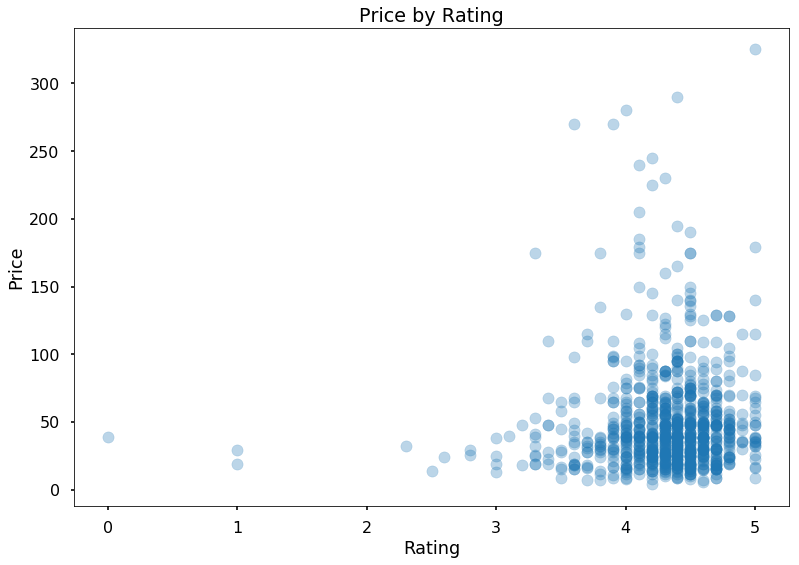

In [47]:
plt.scatter(x=final_merged['rating'],y=final_merged["price"], alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price by Rating')
plt.show()

In [48]:
mod = smf.ols(formula='rating ~ price', data=final_merged)

results = mod.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.054
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.152
Time:                        16:36:15   Log-Likelihood:                -517.51
No. Observations:                 890   AIC:                             1039.
Df Residuals:                     888   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2837      0.024    180.691      0.0

R-squared is 0.002, meaning that there is a very low correlation between price and rating.

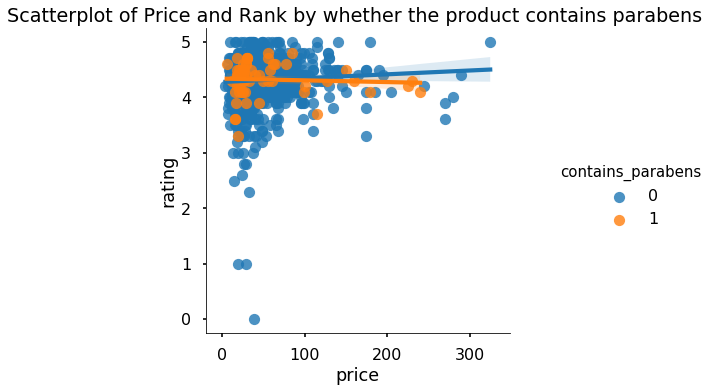

In [49]:
sns.lmplot(x='price', y='rating', data=final_merged, hue='contains_parabens')
plt.title('Scatterplot of Price and Rank by whether the product contains parabens ')
plt.show()

In [50]:
mod = smf.ols(formula='price ~ contains_parabens + rating', data=final_merged)

results = mod.fit()

print('OLS Results with Price as Dependent Variable:' )
print('\n')
print(results.summary())

OLS Results with Price as Dependent Variable:


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.455
Date:                Wed, 05 May 2021   Prob (F-statistic):              0.234
Time:                        16:36:16   Log-Likelihood:                -4500.3
No. Observations:                 890   AIC:                             9007.
Df Residuals:                     887   BIC:                             9021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [51]:
#intercept's p-value is significant at 0.016

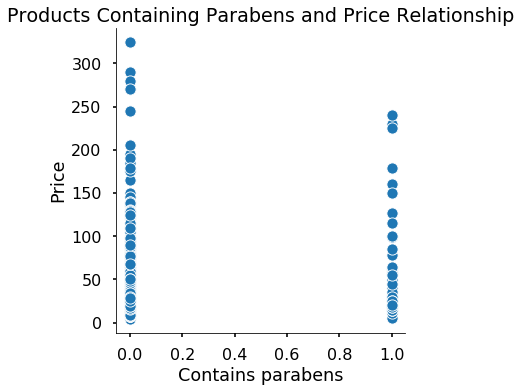

In [52]:
sns.relplot(data=final_merged, x='contains_parabens', y='price')
plt.title('Products Containing Parabens and Price Relationship')
plt.xlabel('Contains parabens')
plt.ylabel('Price')
plt.show()

In [53]:
final_merged['contains_parabens'].value_counts()

0    830
1     60
Name: contains_parabens, dtype: int64

In [54]:
1-(60/890)

0.9325842696629214

In [55]:
x_train, x_test = train_test_split(final_merged, test_size=0.2)
print('Training set')
print(x_train.head())
print('\n')
print('Test set')
print(x_test.head())

Training set
                  brand                               name  price  rating  \
470        Skyn Iceland  The ANTIDOTE Cooling Daily Lotion   48.0     4.5   
98               LA MER    The Moisturizing Cool Gel Cream  175.0     3.3   
474  Kiehl's Since 1851          Ultra Facial Cream SPF 30   32.0     3.8   
724           BeautyBio  The ZenBubble Calming Skin Shield   65.0     4.7   
572               Vichy         Aqualia Thermal Rich Cream   31.0     4.4   

                                           ingredients  contains_parabens  
470  Water/Aqua/Eau, Glycerin, Butylene Glycol, Sod...                  0  
98                           Visit the La Mer boutique                  0  
474  Active: Avobenzone 3%, Homosalate 5%, Octisala...                  0  
724  Water/Aqua/Eau, Glycerin, Dimethicone, Butylen...                  0  
572  Aqua / Water/ Eau, Glycerin, Isocetyl Stearate...                  0  


Test set
             brand                                       

In [56]:
lregression = LogisticRegression().fit(x_train[['price']], x_train['contains_parabens'])
print('Logistic Regression Coefficient is ', lregression.coef_[0][0])
y_pred = lregression.predict(x_test[['price']])
b=np.sum(y_pred==x_test['contains_parabens'])/len(y_pred)
answer=(b*100).round(1)
print('Prediction accuracy of this model is',answer,'%')

Logistic Regression Coefficient is  0.003926852676488595
Prediction accuracy of this model is 89.9 %


In [57]:
#prediction accuracy model is actually worse because 90.4% is less than 93.3%

Train test split to predict whether the product contains parabens, given the rating

In [58]:
x_train2, x_test2 = train_test_split(final_merged, test_size=0.8)
print('Training set')
print(x_train2.head())
print('\n')
print('Test set')
print(x_test2.head())

Training set
          brand                                               name  price  \
830     Origins  Dr. Andrew Weil for Origins Mega-Mushroom Reli...  69.00   
399  Philosophy                     Purity Made Simple Moisturizer  28.00   
406     Clarins  Extra-Firming Wrinkle Control Firming Day Crea...  88.00   
39    DR. JART+                         Premium Beauty Balm SPF 45  39.00   
493         RoC    Multi Correxion 5 in 1 Daily Moisturizer SPF 30  27.99   

     rating                                        ingredients  \
830     4.4  Water\Aqua\Eau, Glycerin, Isododecane, Dimethi...   
399     4.5  Aqua/Water/Eau, Cyclopentasiloxane, Bis-PEG-18...   
406     4.3  Active: Avobenzone 3%, Homosalate 9%, Octocryl...   
39      4.2  -Titanium Dioxide, Octinoxate, Zinc Oxide, and...   
493     4.1  Avobenzone 2.0%, Homosalate 4.0%, Octisalate 4...   

     contains_parabens  
830                  0  
399                  0  
406                  0  
39                   0  
49

In [59]:
logfit= LogisticRegression().fit(x_train2[['rating']], x_train2['contains_parabens'])
print('Logistic Regression Coefficient is ', logfit.coef_[0][0])
testscore = logfit.score(x_test2[['rating']],x_test2['contains_parabens'])
print('Prediction accuracy of the model is: {:.1%}'.format(testscore))


Logistic Regression Coefficient is  0.3004505168708982
Prediction accuracy of the model is: 92.8%


In [60]:
#93.4% is around the same as 93.3%, and is a slightly better prediction model than for price
#just by chance since there are so few products that contain parabens

Markdown

In [61]:
merged_model = LogisticRegression().fit(final_merged[['price']], final_merged['contains_parabens'])
print('Coefficient: ', merged_model.coef_[0][0])
print('Intercept: ', merged_model.intercept_[0])

Coefficient:  0.0028601729889221827
Intercept:  -2.7730370802795434


In [62]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

In [63]:
m = merged_model.coef_[0][0]
b = merged_model.intercept_[0]
price = 40
x = m * price + b
print('Probability that a product that costs $40 contains parabens is:', logit(x))

price2 = 80
x2 = m * price2 + b
print('Probability that a product that costs $80 contains parabens is:', logit(x2))

price3 = 300
x3 = m * price3 + b
print('Probability that a product that costs $300 contains parabens is:', logit(x3))

Probability that a product that costs $40 contains parabens is: 0.06545908237027755
Probability that a product that costs $80 contains parabens is: 0.07281553302045045
Probability that a product that costs $300 contains parabens is: 0.12842182785992012


As price increases, the probability that the product will contain parabens also increases.

In [64]:
merged_rating = LogisticRegression().fit(final_merged[['rating']], final_merged['contains_parabens'])
print('Coefficient: ', merged_rating.coef_[0][0])
print('Intercept: ', merged_rating.intercept_[0])
m = merged_rating.coef_[0][0]
b = merged_rating.intercept_[0]
rating = 1
x = m * rating + b
print('Probability of a product with rank 1 containing parabens:', logit(x))

rating2 = 2
x = m * rating2 + b
print('Probability of a product with rank 2 containing parabens:', logit(x))

rating3 = 3
x = m * rating3 + b
print('Probability of a product with rank 3 containing parabens:', logit(x))

rating4 = 4
x = m * rating4 + b
print('Probability of a product with rank 4 containing parabens:', logit(x))

rating5 = 5
x = m * rating5 + b
print('Probability of a product with rank 5 containing parabens:', logit(x))

Coefficient:  0.05040202097133544
Intercept:  -2.8445366104048415
Probability of a product with rank 1 containing parabens: 0.05764195582488349
Probability of a product with rank 2 containing parabens: 0.06044158861928208
Probability of a product with rank 3 containing parabens: 0.06336805416782826
Probability of a product with rank 4 containing parabens: 0.0664261958871556
Probability of a product with rank 5 containing parabens: 0.06962095326534885


As the rating increases, the probability that the product will contain parabens increases. This is different from the ulta dataset, where as rank increased, probability of containing parabens decreased.

AttributeError: 'DataFrame' object has no attribute 'predict_proba'

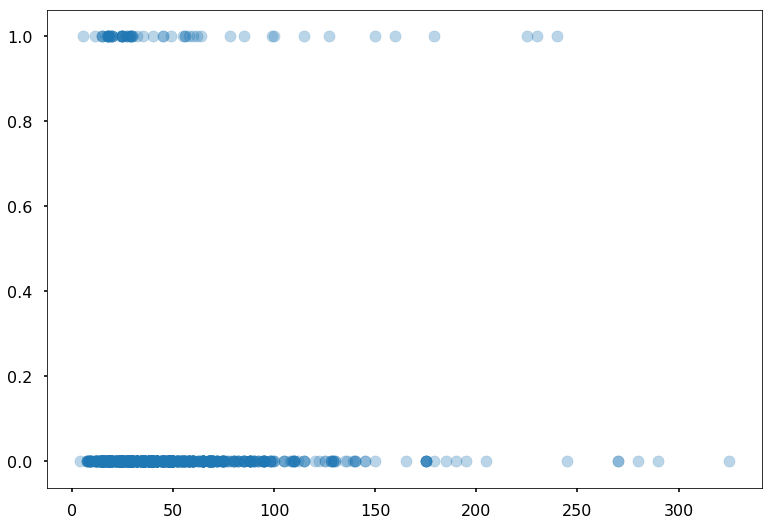

In [65]:
#logistic graph does not tell us much about the relationship between predicting parabens with the product's price
#also unsure how to resolve error

plt.scatter(
    final_merged.price, 
    final_merged.contains_parabens, 
    alpha = 0.3,
    label='Containing parabens'
)

#  logit probability of class 1
plt.scatter(
    final_merged.price, 
    final_merged.predict_proba(final_merged[['price']])[:,1], 
    alpha = 0.3,
    label='Predicted probability containing parabens'
)
plt.xlabel('Price')
plt.ylabel('Probability Product contains Parabens')
plt.title('Predicted vs Actual: Containing Parabens by Price')
plt.legend()
plt.show()

T-test

In [ ]:
subset1=final_merged.loc[(final_merged['contains_parabens']==0)]
subset2=final_merged.loc[(final_merged['contains_parabens']==1)]
print(stats.levene(subset1['price'], subset2['price']))

In [ ]:
ttest= stats.ttest_ind(subset1['price'], subset2['price'], equal_var= False)
print(ttest)

The p value for this test is 0.52. Since our P value is more than our significant level of 0.05, we fail to reject the null hypothesis and cannot accept the alternative hypothesis. In other words, there is no statistically significant difference between the mean price of products with and without parabens. This is different from the Sephora dataset, where there *is* a significance.

In [ ]:
subset_rating=final_merged.loc[(final_merged['contains_parabens']==0)]
subset_rating2=final_merged.loc[(final_merged['contains_parabens']==1)]
print(stats.levene(subset_rating['rating'], subset_rating2['rating']))

In [ ]:
ttest= stats.ttest_ind(subset_rating['rating'], subset_rating2['rating'], equal_var= True)
print(ttest)

The p value for this test is 0.86. Since our P value is not smaller than our significant level of 0.05, we fail to reject null hypoethesis. In other words, there is no statistically significant difference between the mean rating of products with and without parabens.